In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 10.2 MB/s eta 0:00:00


In [ ]:
!pip install -U torch sahi ultralytics
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import torch
import yaml
import pandas as pd
from pathlib import Path
from IPython.display import Image, display
import cv2
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/Fishv13/'

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
data_path = '/content/drive/My Drive/Fishv13/data.yaml'
!ls "{data_path}"

'/content/drive/My Drive/Fishv13/data.yaml'


In [ ]:
model=YOLO('yolov8n.pt')

In [ ]:
import yaml

with open(data_path, 'r') as f:
    data = yaml.safe_load(f)


print("Dataset structure:")
for key, value in data.items():
    print(f"{key}: {value}")


Dataset structure:
train: ../train/images
val: ../valid/images
test: ../test/images
nc: 9
names: ['Coris julis', 'Diplodus annulairs yed safra', 'Diplodus sargus', 'Diplodus vulgaris', 'Spicara maena', 'oblada melanura', 'serranus cabrilla', 'unknown', 'unknown fish']
roboflow: {'workspace': 'yassine-arugj', 'project': 'my-first-project-nkgff', 'version': 13, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/yassine-arugj/my-first-project-nkgff/dataset/13'}


In [ ]:
import os
from pathlib import Path

def count_images_in_folders(train_path, val_path, test_path):
    """
    Count number of images in train, val, and test folders
    """
    # Image extensions to look for
    img_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff', '.webp'}

    print("=" * 60)
    print("DATASET IMAGE COUNT")
    print("=" * 60)

    folders = {
        'Train': train_path,
        'Val': val_path,
        'Test': test_path
    }

    for name, folder_path in folders.items():
        folder = Path(folder_path)

        if folder.exists():
            # Count files with image extensions
            image_count = sum(1 for f in folder.iterdir()
                            if f.is_file() and f.suffix.lower() in img_extensions)
            print(f"{name:6}: {image_count:5} images in {folder}")
        else:
            print(f"{name:6}: Folder not found - {folder}")

    print("=" * 60)

# MANUAL PATHS - Update these with your actual folder paths
train_path = '/content/drive/My Drive/Fishv13/train/images'
val_path = '/content/drive/My Drive/Fishv13/valid/images'
test_path = '/content/drive/My Drive/Fishv13/test/images'

# Count images
count_images_in_folders(train_path, val_path, test_path)
# Display additional info
print("=" * 60)
print(f"Number of classes (nc): {data.get('nc', 'N/A')}")
print(f"Class names: {data.get('names', 'N/A')}")
print("=" * 60)

DATASET IMAGE COUNT
Train :  1713 images in /content/drive/My Drive/Fishv13/train/images
Val   :   286 images in /content/drive/My Drive/Fishv13/valid/images
Test  :   194 images in /content/drive/My Drive/Fishv13/test/images
Number of classes (nc): 9
Class names: ['Coris julis', 'Diplodus annulairs yed safra', 'Diplodus sargus', 'Diplodus vulgaris', 'Spicara maena', 'oblada melanura', 'serranus cabrilla', 'unknown', 'unknown fish']


In [ ]:
print("Start training...")

from ultralytics import YOLO

model = YOLO('yolov8n.pt') # Load the pre-trained YOLOv11 model

# Train the model
results = model.train(
    data=data_path,
    epochs=70,              # Increase epochs for better learning
    imgsz=1280,              # Correct image size
    batch=16,
    device=device,          # Use the detected device ('cpu' in this case)
    name='yolov8n_fish_detector',  # Training run name
    patience=30,            # Early stopping patience
    save=True,              # Save checkpoints
    plots=True,             # Generate training plots
    verbose=True
)

print("✓ Training complete!")

Start training...
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/Fishv13/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_fish_detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pati

In [ ]:
from ultralytics import YOLO

# Load the best trained YOLOv8 model
best_model = YOLO('/content/runs/detect/yolov8n_fish_detector/weights/best.pt')
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
print("Validating on the test set...")

test_results = best_model.val(
    data='/content/drive/My Drive/Fishv13/data.yaml',  # update if different
    split='test',
    batch=2
)

print("\n=== Test Results ===")
print(f"mAP50-95: {test_results.box.map:.4f}")
print(f"mAP50: {test_results.box.map50:.4f}")
print(f"mAP75: {test_results.box.map75:.4f}")


Validating on the test set...
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 1.7±2.3 ms, read: 34.1±46.4 MB/s, size: 249.9 KB)
val: Scanning /content/drive/.shortcut-targets-by-id/1_DYw7qXJWim2Jg0lH-kpUuNYMEhasLBI/My First Project.v13i.yolov8/test/labels.cache... 194 images, 16 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 194/194 268.1Kit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 14, len(boxes) = 921. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 97/97 17.6it/s 5.5s
                   all        194        921      0.713      0.554      0.581      0.346
           Coris ju

In [ ]:
# Update this to your test images folder path
test_images_path = '/content/drive/My Drive/Fishv13/test/images'

print("Running predictions on test images...")

# Predict on test images
prediction_results = best_model.predict(
    source=test_images_path,
    save=True,
    save_txt=True,
    conf=0.30,              # Confidence threshold
    iou=0.45,               # IoU threshold for NMS
    show_labels=True,       # Show labels on images
    show_conf=True          # Show confidence scores
)

print(f"✓ Predictions saved in: runs/detect/predict/")

Running predictions on test images...

image 1/194 /content/drive/My Drive/Fishv13/test/images/GX010013_MP4-0001_jpg.rf.d10f0dedbdffcd1b866286b22fcdcdc7.jpg: 736x1280 1 Diplodus vulgaris, 16.3ms
image 2/194 /content/drive/My Drive/Fishv13/test/images/GX010013_MP4-0007_jpg.rf.ae191e26871832c5fefb542e730bcf90.jpg: 736x1280 3 Diplodus vulgariss, 37.2ms
image 3/194 /content/drive/My Drive/Fishv13/test/images/GX010013_MP4-0008_jpg.rf.8fc7f77ff3ac767ae4c144eeff15d406.jpg: 736x1280 5 Diplodus vulgariss, 33.9ms
image 4/194 /content/drive/My Drive/Fishv13/test/images/GX010013_MP4-0009_jpg.rf.380c3908284fd9bbec8f4dfa2f4e11af.jpg: 736x1280 3 Diplodus vulgariss, 1 unknown fish, 12.3ms
image 5/194 /content/drive/My Drive/Fishv13/test/images/GX010013_MP4-0017_jpg.rf.80414e9f620e79060f21093834f9365e.jpg: 736x1280 2 Diplodus vulgariss, 12.4ms
image 6/194 /content/drive/My Drive/Fishv13/test/images/GX010013_MP4-0022_jpg.rf.44379b05b74fe03423f2b5c3de2a98c9.jpg: 736x1280 1 Diplodus vulgaris, 14.1ms
image


image 1/1 /content/drive/My Drive/Fishv13/test/images/GX030013_MP4-0792_jpg.rf.3befbbea52d26badfcb00805fe2ac12f.jpg: 736x1280 5 Diplodus sarguss, 1 Spicara maena, 2 oblada melanuras, 2 unknown fishs, 12.3ms
Speed: 6.2ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to /content/runs/detect/predict
179 labels saved to /content/runs/detect/predict/labels


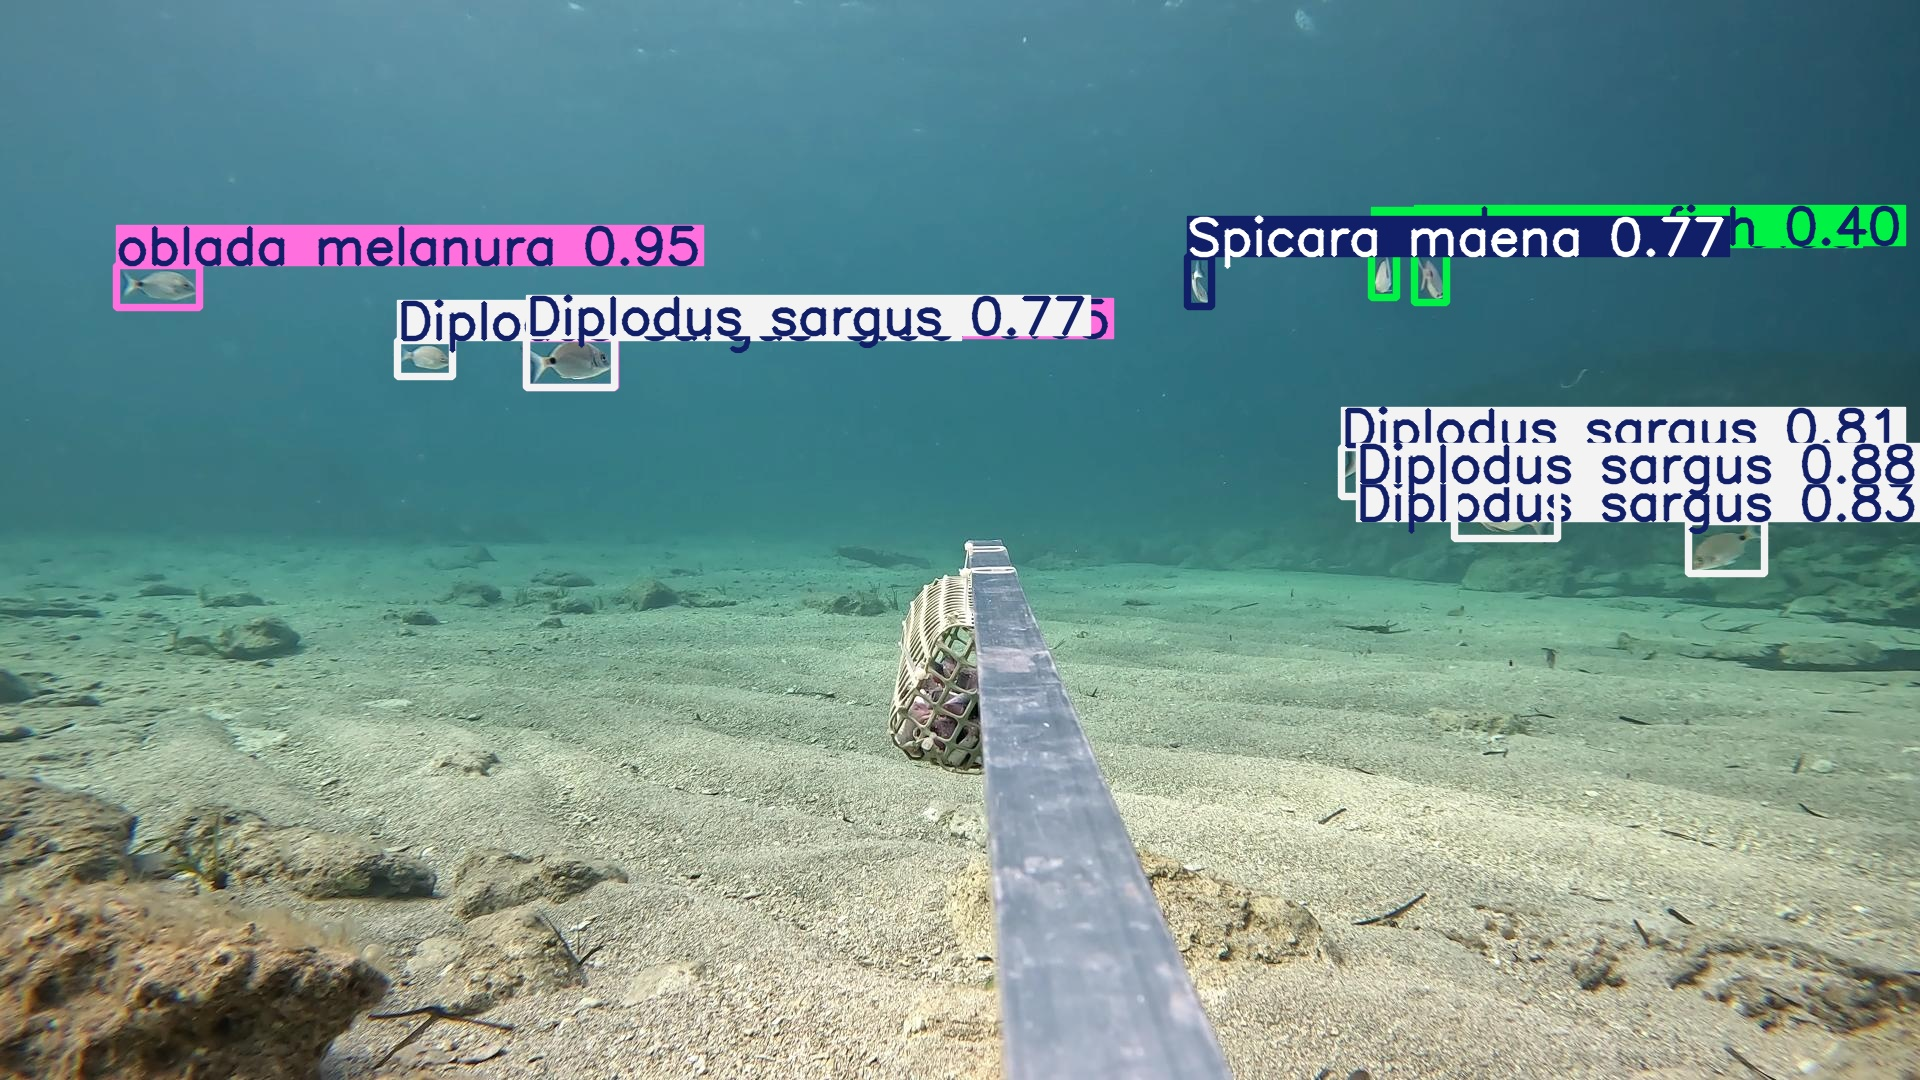

In [ ]:
# Test on one specific image
single_image_path = '/content/drive/My Drive/Fishv13/test/images/GX030013_MP4-0792_jpg.rf.3befbbea52d26badfcb00805fe2ac12f.jpg'

result = best_model.predict(
    source=single_image_path,
    save=True,
    save_txt=True,
    conf=0.25
)

# Display the result
from IPython.display import Image, display
display(Image(filename='/content/runs/detect/predict/GX030013_MP4-0792_jpg.rf.3befbbea52d26badfcb00805fe2ac12f.jpg'))

In [ ]:
import pandas as pd

# Get evaluation results (already computed)
metrics = test_results

# Safely extract speed info
speed_info = metrics.speed if hasattr(metrics, "speed") else {}
validation_time = round(speed_info.get("total", 0), 2)

# Build performance dictionary
performance_report = {
    "Metric": [
        "Precision",
        "Recall",
        "mAP50",
        "mAP50-95",
        "F1 Score",
        "Validation Time (s)"
    ],
    "Value": [
        round(metrics.box.mp, 4),        # mean precision
        round(metrics.box.mr, 4),        # mean recall
        round(metrics.box.map50, 4),     # mAP@50
        round(metrics.box.map, 4),       # mAP@50-95
        round(2 * (metrics.box.mp * metrics.box.mr) / (metrics.box.mp + metrics.box.mr + 1e-6), 4),  # F1 Score
        validation_time
    ]
}

# Display as a nice table
df_report = pd.DataFrame(performance_report)
print("=== 📊 YOLOv8n Model Performance Report ===")
display(df_report)


=== 📊 YOLOv8n Model Performance Report ===


,Metric,Value
0,Precision,0.7126
1,Recall,0.5539
2,mAP50,0.5808
3,mAP50-95,0.3464
4,F1 Score,0.6233
5,Validation Time (s),0.0000


In [ ]:
from ultralytics import YOLO

# Load your model
model = YOLO("/content/runs/detect/yolov8n_fish_detector/weights/best.pt")

# Path to your video in Drive
video_path = "/content/drive/MyDrive/1207.mp4"

# Output folder
output_path = "/content/runs/detect/video_results"

# Run prediction
model.predict(
    source=video_path,
    save=True,
    save_txt=False,
    project=output_path,
    name="fish_video",
    conf=0.30,
    stream=False
)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/301) /content/drive/MyDrive/1207.mp4: 736x1280 1 Coris julis, 1 Diplodus annulairs yed safra, 5 Diplodus sarguss, 7 Diplodus vulgariss, 2 unknown fishs, 91.8ms
video 1/1 (frame 2/301) /content/drive/MyDrive/1207.mp4: 736x1280 2 Coris juliss, 5 Diplodus sarguss, 7 Diplodus vulgariss, 1 unknown fish, 12.3ms
video 1/1 (frame 3/301) /content/drive/MyDrive/1207.mp4: 736x1280 2 Coris juliss, 5 Diplodus sarguss, 6 Diplodus vulgariss, 2 unkn

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Coris julis', 1: 'Diplodus annulairs yed safra', 2: 'Diplodus sargus', 3: 'Diplodus vulgaris', 4: 'Spicara maena', 5: 'oblada melanura', 6: 'serranus cabrilla', 7: 'unknown', 8: 'unknown fish'}
 obb: None
 orig_img: array([[[140, 131,  81],
         [140, 131,  81],
         [140, 131,  81],
         ...,
         [119, 114,  67],
         [119, 114,  67],
         [119, 114,  67]],
 
        [[140, 131,  81],
         [140, 131,  81],
         [140, 131,  81],
         ...,
         [119, 114,  67],
         [119, 114,  67],
         [119, 114,  67]],
 
        [[140, 131,  81],
         [140, 131,  81],
         [140, 131,  81],
         ...,
         [118, 113,  66],
         [118, 113,  66],
         [118, 113,  66]],
 
        ...,
 
        [[ 47,  76,  78],
         [ 47,  76,  78],
         [ 47,  76,  78],
         ...,
      

In [ ]:
!ls /content/runs/detect/video_results



fish_video  fish_video2  fish_video3  fish_video4


In [ ]:
import shutil  # <--- This line was missing or skipped in your execution
import os
# 2. Define your source (where the model is now)
source_path = '/content/runs/detect/yolov8n_fish_detector/weights/best.pt'

# 3. Define destination (where you want it in Drive)
# I'm renaming it to 'fish_model.pt' so it's easy to find later
destination_path = '/content/drive/My Drive/fish_model.pt'

# 4. Copy the file
shutil.copy(source_path, destination_path)

print(f"✅ Success! Model saved to: {destination_path}")

✅ Success! Model saved to: /content/drive/My Drive/fish_model.pt


In [ ]:
import os
from google.colab import files

# 1. Define the folder you want to download
# Based on your image, I selected 'fish_video'. Change this to 'fish_video2' etc. if needed.
folder_path = '/content/runs/detect/video_results/fish_video'

# 2. Zip the folder
# This creates a file named 'fish_video_results.zip'
!zip -r /content/fish_video_results.zip {folder_path}

# 3. Download the zip file
files.download('/content/fish_video_results.zip')

  adding: content/runs/detect/video_results/fish_video/ (stored 0%)
  adding: content/runs/detect/video_results/fish_video/myvideo.avi (deflated 4%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>